In [1]:
import pandas as pd
import numpy as np
from sdv.evaluation import evaluate
from sdv import SDV

In [3]:
#load UCI Adult Dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None,names=['age','workclass','fnlwgt','education','educationnum','maritalstatus',
                                                'occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','target'])

In [10]:
#load our models
tvae_model = SDV.load('tvae.model')
copulaGAN_model = SDV.load("copulaGAN.model")
copula_model = SDV.load("copula.model")
ctgan_model = SDV.load('ctgan.model')

In [13]:
#evaluate aggregate metrics, using the full dataset takes a very long time or does not return
tvae_fit = evaluate(tvae_model.sample(4000), df.sample(4000))
copulaGAN_fit = evaluate(copulaGAN_model.sample(4000), df.sample(4000))
copula_fit = evaluate(copula_model.sample(4000), df.sample(4000))
ctgan_fit = evaluate(ctgan_model.sample(4000), df.sample(4000))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sdmetrics/base.py:97: RuntimeWarning: overflow encountered in exp
  score = 1 / (1 + np.exp(-raw_score))
/usr/local/lib/python3.6/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [14]:
print("tvae ", tvae_fit, " ctgan ", ctgan_fit, " copula ", copula_fit, " copulaGAN ",copulaGAN_fit)

tvae  0.658597063361855  ctgan  0.5969854683011662  copula  0.40343878598398397  copulaGAN  0.5270008530599393


In [15]:
#disaggregate metrics
tvae_fit = evaluate(tvae_model.sample(4000), df.sample(4000),aggregate=False)
copulaGAN_fit = evaluate(copulaGAN_model.sample(4000), df.sample(4000),aggregate=False)
copula_fit = evaluate(copula_model.sample(4000), df.sample(4000),aggregate=False)
ctgan_fit = evaluate(ctgan_model.sample(4000), df.sample(4000),aggregate=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


<AxesSubplot:xlabel='metric'>

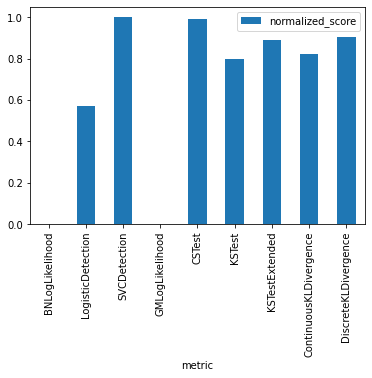

In [23]:
#both log likelihood models failed to provide meaningful results
tvae_fit.plot.bar(x='metric', y='normalized_score')

In [17]:
#disaggregated metrics for ctgan
ctgan_fit

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-1.141564e+01,0.000011,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,5.686206e-01,0.568621,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,9.946952e-01,0.994695,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-6.528223e+09,0.000000,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,9.812789e-01,0.981279,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,7.951667e-01,0.795167,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,8.689000e-01,0.868900,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,8.281369e-01,0.828137,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,7.649390e-01,0.764939,0.0,1.0,MAXIMIZE


In [11]:
#SDV includes metrics based on training models on the use case
from sdv.metrics.tabular import MulticlassDecisionTreeClassifier

MulticlassDecisionTreeClassifier.compute(ctgan_model.sample(len(df)),df, target='target')

0.7105389570347894